In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
from fredapi import Fred
fred = Fred(api_key='API KEY HERE')

In [2]:
# IGNORE THE CONTENT OF THIS CELL
# import tensorflow as tf
# tf.compat.v1.disable_eager_execution()

In [3]:
FedTicker = 'T10Y2Y'
DXY_Fed = 'DTWEXBGS'
Ticker = 'SPY'

In [4]:
df = yf.download(Ticker)

DXY = fred.get_series(DXY_Fed)
DXY = pd.DataFrame(DXY, index = None)
DXY.columns = ['DXY']

fed_df = fred.get_series(FedTicker)
fed_df = pd.DataFrame(fed_df, index = None)
fed_df.columns = ['RateDiff']

fed_df = pd.merge(DXY, fed_df, left_index=True, right_index=True).fillna(method='ffill').fillna(method = 'bfill')
C_df = pd.merge(df, fed_df, left_index=True, right_index=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
len(C_df)

4316

In [6]:
C_df

,Open,High,Low,Close,Adj Close,Volume,DXY,RateDiff
2006-01-03,125.190002,127.000000,124.389999,126.699997,90.987625,73256700,100.7558,0.03
2006-01-04,126.860001,127.489998,126.699997,127.300003,91.418510,51899600,100.2288,0.05
2006-01-05,127.150002,127.589996,126.879997,127.379997,91.475983,47307500,100.2992,0.04
2006-01-06,128.020004,128.580002,127.360001,128.440002,92.237206,62885900,100.0241,0.02
2006-01-09,128.419998,129.059998,128.380005,128.770004,92.474228,43527400,100.1794,0.02
...,...,...,...,...,...,...,...,...
2023-02-17,406.059998,407.510010,404.049988,407.260010,407.260010,89169100,120.5898,-0.78
2023-02-21,403.059998,404.160004,398.820007,399.089996,399.089996,82655900,120.6705,-0.72
2023-02-22,399.519989,401.130005,397.019989,398.540009,398.540009,83742300,120.8904,-0.73
2023-02-23,401.559998,402.200012,396.250000,400.660004,400.660004,96242400,121.1348,-0.78


In [7]:
test_ind = 51


In [63]:
# Notice the minus sign in our indexing

train = C_df.iloc[:-test_ind]
test = C_df.iloc[-test_ind:]

In [64]:
train

,Open,High,Low,Close,Adj Close,Volume,DXY,RateDiff
2006-01-03,125.190002,127.000000,124.389999,126.699997,90.987625,73256700,100.7558,0.03
2006-01-04,126.860001,127.489998,126.699997,127.300003,91.418510,51899600,100.2288,0.05
2006-01-05,127.150002,127.589996,126.879997,127.379997,91.475983,47307500,100.2992,0.04
2006-01-06,128.020004,128.580002,127.360001,128.440002,92.237206,62885900,100.0241,0.02
2006-01-09,128.419998,129.059998,128.380005,128.770004,92.474228,43527400,100.1794,0.02
...,...,...,...,...,...,...,...,...
2022-12-05,403.950012,404.929993,398.170013,399.589996,397.763458,77289800,122.5802,-0.81
2022-12-06,399.420013,399.989990,391.640015,393.829987,392.029785,77972200,122.9649,-0.83
2022-12-07,392.940002,395.640015,391.970001,393.160004,391.362854,65927900,122.7015,-0.84
2022-12-08,395.140015,397.359985,393.269989,396.239990,394.428772,60737900,122.3684,-0.83


In [65]:
test

,Open,High,Low,Close,Adj Close,Volume,DXY,RateDiff
2022-12-12,394.109985,398.950012,393.410004,398.950012,397.126404,75405800,122.7245,-0.78
2022-12-13,410.220001,410.489990,399.070007,401.970001,400.132599,123782500,121.8116,-0.71
2022-12-14,401.609985,405.500000,396.309998,399.399994,397.574341,108111300,121.7922,-0.74
2022-12-15,394.299988,395.250000,387.890015,389.630005,387.848999,117705900,122.5201,-0.79
2022-12-16,385.179993,386.579987,381.040009,383.269989,383.269989,119858000,122.6127,-0.69
2022-12-19,383.470001,383.820007,378.279999,380.019989,380.019989,79878100,122.5102,-0.68
2022-12-20,379.230011,382.230011,377.850006,380.540009,380.540009,74427200,122.1117,-0.56
2022-12-21,383.250000,387.410004,382.690002,386.230011,386.230011,78167400,122.2665,-0.53
2022-12-22,383.049988,386.209991,374.769989,380.720001,380.720001,100120900,122.2105,-0.57
2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300,121.9579,-0.56


## Scale Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [14]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
# scaled_train

In [17]:
# define generator
length = 50 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [18]:
len(scaled_train)

4265

In [19]:
len(generator) 

4215

In [20]:
# scaled_train

In [21]:
# What does the first batch look like?
X,y = generator[0]

In [22]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.13917865 0.13903117 0.14008705 0.14304199 0.09334614 0.06228188
 0.35673097 0.232      0.14323924 0.14022634 0.14573552 0.14450685
 0.09437665 0.03717821 0.3444328  0.23733333 0.14394438 0.14047025
 0.14617566 0.14470214 0.0945141  0.03178055 0.34607567 0.23466667
 0.14605978 0.14288502 0.14734938 0.14729005 0.09633466 0.05009178
 0.33965588 0.22933333 0.14703236 0.1440558  0.14984352 0.14809572
 0.09690153 0.02733732 0.34327999 0.22933333 0.14695942 0.14386066
 0.14955007 0.14841307 0.09712468 0.02902218 0.34244456 0.22933333
 0.14849128 0.14498268 0.15069933 0.14941406 0.09782891 0.03447391
 0.33608311 0.22933333 0.14863716 0.14459241 0.14999023 0.14816895
 0.09695302 0.02378966 0.340594   0.232      0.14739711 0.14366553
 0.14940336 0.14787596 0.0967468  0.02889982 0.33833506 0.22933333
 0.14649743 0.14249475 0.14844972 0.14702149 0.09614577 0.03737451
 0.34480385 0.22666667 0.14498992 0.14366553 0.14686034 0.14577637
 0.09526977 0.06441045 0.34862632 0.22666667

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [24]:
scaled_train.shape

(4265, 8)

In [27]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100, input_shape=(length,scaled_train.shape[1])))


# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               43600     
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 808       
Total params: 44,408
Trainable params: 44,408
Non-trainable params: 0
_________________________________________________________________


## EarlyStopping

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)

In [30]:
model.fit_generator(generator,epochs=10,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

C:\Users\Albert\Anaconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
4215/4215 [==============================] - 31s 7ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 2/10
4215/4215 [==============================] - 26s 6ms/step - loss: 6.6166e-04 - val_loss: 0.0020
Epoch 3/10
4215/4215 [==============================] - 28s 7ms/step - loss: 5.8949e-04 - val_loss: 0.0012
Epoch 4/10
4215/4215 [==============================] - 27s 6ms/step - loss: 5.3580e-04 - val_loss: 3.9814e-04
Epoch 5/10
4215/4215 [==============================] - 28s 7ms/step - loss: 5.1650e-04 - val_loss: 6.7266e-04
Epoch 6/10
4215/4215 [==============================] - 27s 6ms/step - loss: 5.0966e-04 - val_loss: 7.7170e-04


In [31]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

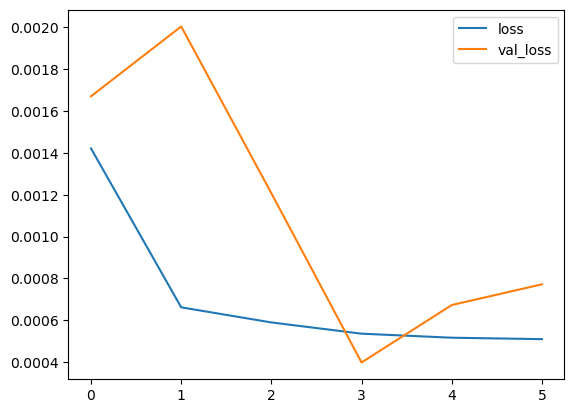

In [32]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [33]:
first_eval_batch = scaled_train[-length:]

In [34]:
first_eval_batch

array([[0.7144941 , 0.72176691, 0.70896912, 0.7057373 , 0.72607241,
        0.15685009, 0.97859605, 0.12      ],
       [0.71274342, 0.7282062 , 0.71427522, 0.72875974, 0.74852232,
        0.08167615, 0.96863383, 0.104     ],
       [0.74026794, 0.75125614, 0.73227213, 0.75649416, 0.77556694,
        0.09795143, 0.94831968, 0.096     ],
       [0.74267516, 0.75481727, 0.74298223, 0.75434571, 0.77347193,
        0.07968874, 0.96394092, 0.12      ],
       [0.74809734, 0.75301232, 0.74721243, 0.74484868, 0.76421112,
        0.07295097, 0.97268733, 0.11733333],
       [0.73192793, 0.73976779, 0.71850549, 0.71943363, 0.73942813,
        0.10287259, 0.97418784, 0.11466667],
       [0.71974613, 0.71762033, 0.71050962, 0.71267089, 0.73283359,
        0.06555673, 0.97418784, 0.11466667],
       [0.70583799, 0.71474216, 0.70571692, 0.70710448, 0.72740566,
        0.08488071, 0.98285957, 0.12533333],
       [0.70566784, 0.70691253, 0.7071596 , 0.70422364, 0.72459641,
        0.06667221, 0.993932

In [67]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [68]:
model.predict(first_eval_batch)

array([[0.7751759 , 0.78079844, 0.77107465, 0.7807324 , 0.7921535 ,
        0.06716929, 0.801308  , 0.01062153]], dtype=float32)

In [69]:
scaled_test[0]

array([0.79305562, 0.80235622, 0.79790201, 0.80771489, 0.82551383,
       0.06480798, 0.86939669, 0.016     ])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [70]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [71]:
test_predictions

[array([0.7751759 , 0.78079844, 0.77107465, 0.7807324 , 0.7921535 ,
        0.06716929, 0.801308  , 0.01062153], dtype=float32),
 array([0.7587308 , 0.7642174 , 0.75573653, 0.76399326, 0.77340895,
        0.06511148, 0.7554567 , 0.01067822], dtype=float32),
 array([0.74672544, 0.75076914, 0.74302083, 0.75204444, 0.7576626 ,
        0.06267694, 0.71597767, 0.01247096], dtype=float32),
 array([0.7358803 , 0.73852754, 0.73170906, 0.7413188 , 0.7428852 ,
        0.06033586, 0.6799624 , 0.01533021], dtype=float32),
 array([0.72574246, 0.7271635 , 0.7214493 , 0.7312604 , 0.7288543 ,
        0.05816846, 0.64664835, 0.01905724], dtype=float32),
 array([0.7161146 , 0.716475  , 0.71197826, 0.7216651 , 0.71546924,
        0.05618241, 0.61545116, 0.02357903], dtype=float32),
 array([0.7069077 , 0.7063425 , 0.70312345, 0.7124522 , 0.7026677 ,
        0.0543656 , 0.5859522 , 0.02885029], dtype=float32),
 array([0.69807667, 0.6966924 , 0.69477105, 0.7035868 , 0.6904059 ,
        0.05271206, 0.5578557

In [72]:
scaled_test

array([[0.79305562, 0.80235622, 0.79790201, 0.80771489, 0.82551383,
        0.06480798, 0.86939669, 0.016     ],
       [0.83222701, 0.83050388, 0.811742  , 0.81508791, 0.83270351,
        0.12167115, 0.84809308, 0.03466667],
       [0.81129182, 0.81833258, 0.80499315, 0.80881348, 0.82658513,
        0.10325084, 0.84764036, 0.02666667],
       [0.79351761, 0.79333136, 0.78440438, 0.78496097, 0.8033258 ,
        0.11452857, 0.86462677, 0.01333333],
       [0.77134241, 0.77218396, 0.76765456, 0.76943358, 0.79237455,
        0.1170582 , 0.8667877 , 0.04      ],
       [0.76718458, 0.76545197, 0.76090571, 0.76149901, 0.78460178,
        0.07006484, 0.86439574, 0.04266667],
       [0.75687507, 0.76157374, 0.75985428, 0.76276859, 0.78584547,
        0.06365771, 0.85509627, 0.07466667],
       [0.76664965, 0.77420849, 0.77168917, 0.7766602 , 0.7994538 ,
        0.06805404, 0.85870872, 0.08266667],
       [0.76616332, 0.77128148, 0.75232294, 0.76320803, 0.78627595,
        0.09385872, 0.857401

## Inverse Transformations and Compare

In [73]:
true_predictions = scaler.inverse_transform(test_predictions)

In [74]:
true_predictions

array([[ 3.86756605e+02,  3.90111751e+02,  3.82438688e+02,
         3.87897982e+02,  3.83177553e+02,  7.74146998e+07,
         1.19806769e+02, -8.00169252e-01],
       [ 3.79993228e+02,  3.83313848e+02,  3.76166009e+02,
         3.81041634e+02,  3.75339967e+02,  7.56640024e+07,
         1.17841954e+02, -7.99956687e-01],
       [ 3.75055772e+02,  3.77800340e+02,  3.70965797e+02,
         3.76147396e+02,  3.68755997e+02,  7.35927985e+07,
         1.16150203e+02, -7.93233898e-01],
       [ 3.70595497e+02,  3.72781527e+02,  3.66339736e+02,
         3.71754183e+02,  3.62577164e+02,  7.16011159e+07,
         1.14606881e+02, -7.82511711e-01],
       [ 3.66426101e+02,  3.68122497e+02,  3.62143910e+02,
         3.67634261e+02,  3.56710483e+02,  6.97571867e+07,
         1.13179310e+02, -7.68535335e-01],
       [ 3.62466444e+02,  3.63740432e+02,  3.58270626e+02,
         3.63704013e+02,  3.51113835e+02,  6.80675397e+07,
         1.11842451e+02, -7.51578633e-01],
       [ 3.58679925e+02,  3.595863

In [84]:
test[:1]
#train[-1:]

,Open,High,Low,Close,Adj Close,Volume,DXY,RateDiff
2022-12-12,394.109985,398.950012,393.410004,398.950012,397.126404,75405800,122.7245,-0.78


In [85]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)


In [88]:
true_predictions.set_index(test.index, inplace = True)
true_predictions

,Open,High,Low,Close,Adj Close,Volume,DXY,RateDiff
2022-12-12,386.756605,390.111751,382.438688,387.897982,383.177553,7.741470e+07,119.806769,-0.800169
2022-12-13,379.993228,383.313848,376.166009,381.041634,375.339967,7.566400e+07,117.841954,-0.799957
2022-12-14,375.055772,377.800340,370.965797,376.147396,368.755997,7.359280e+07,116.150203,-0.793234
2022-12-15,370.595497,372.781527,366.339736,371.754183,362.577164,7.160112e+07,114.606881,-0.782512
2022-12-16,366.426101,368.122497,362.143910,367.634261,356.710483,6.975719e+07,113.179310,-0.768535
2022-12-19,362.466444,363.740432,358.270626,363.704013,351.113835,6.806754e+07,111.842451,-0.751579
2022-12-20,358.679925,359.586313,354.649364,359.930404,345.761175,6.652187e+07,110.578366,-0.731811
2022-12-21,355.047990,355.629961,351.233567,356.299154,340.634188,6.511511e+07,109.374378,-0.709359
2022-12-22,351.559410,351.851263,347.991522,352.802743,335.718765,6.385042e+07,108.221419,-0.684330
2022-12-23,348.206415,348.235802,344.900704,349.436264,331.003394,6.273655e+07,107.112863,-0.656819


In [234]:
#from tensorflow.keras.models import load_model

In [235]:
#model.save("multivariate.h5")